In [9]:
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# import necessary libraries
import pandas as pd

# load data into pandas dataframe
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

df = pd.read_csv(path, header = 0)

df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


<Axes: >

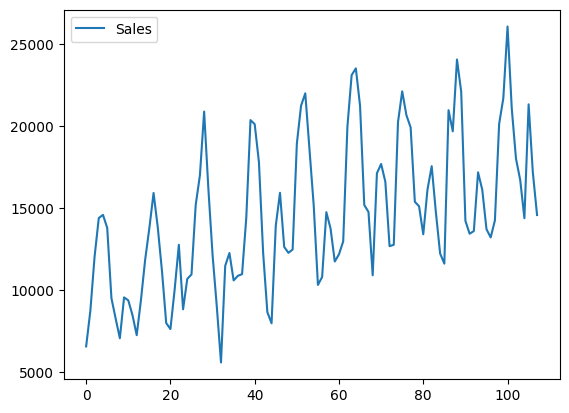

In [11]:
df.plot()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/obgepvl8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/cm5w26re.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8850', 'data', 'file=/tmp/tmp42_q96t4/obgepvl8.json', 'init=/tmp/tmp42_q96t4/cm5w26re.json', 'output', 'file=/tmp/tmp42_q96t4/prophet_modelkt4d898k/prophet_model-20230504033307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:33:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:33:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


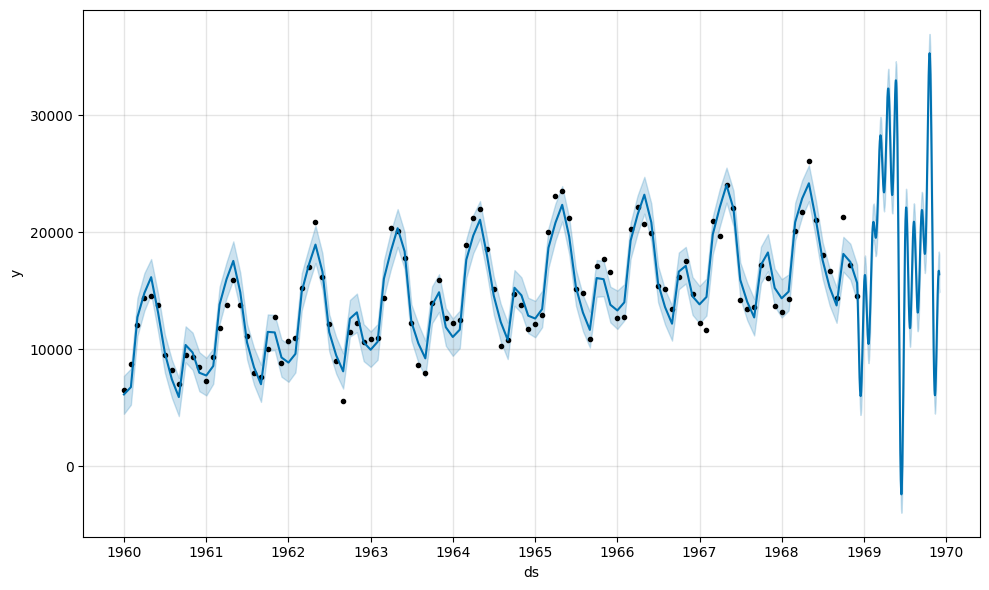

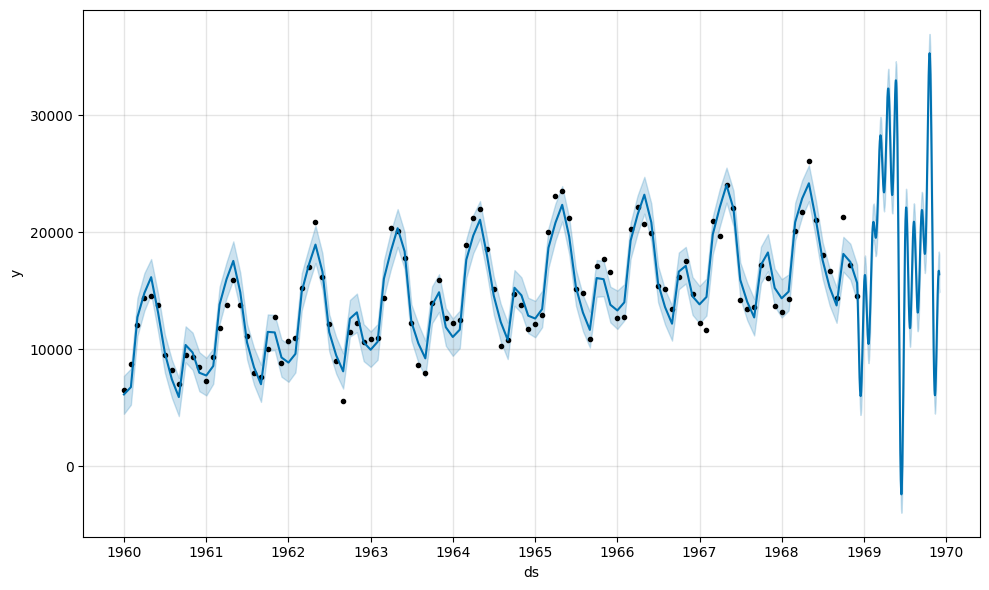

In [12]:
# rename columns to match Prophet's naming convention
df = df.rename(columns={'Month': 'ds', 'Sales': 'y'})

# create a Prophet model and fit the data
m = Prophet()
m.fit(df)

# create a dataframe for future predictions
future = m.make_future_dataframe(periods=365)

# make predictions for the future dataframe
forecast = m.predict(future)

# plot the forecasted values and uncertainty intervals
m.plot(forecast)


솔직히 잘 학습된 것은 아닌 것 같음

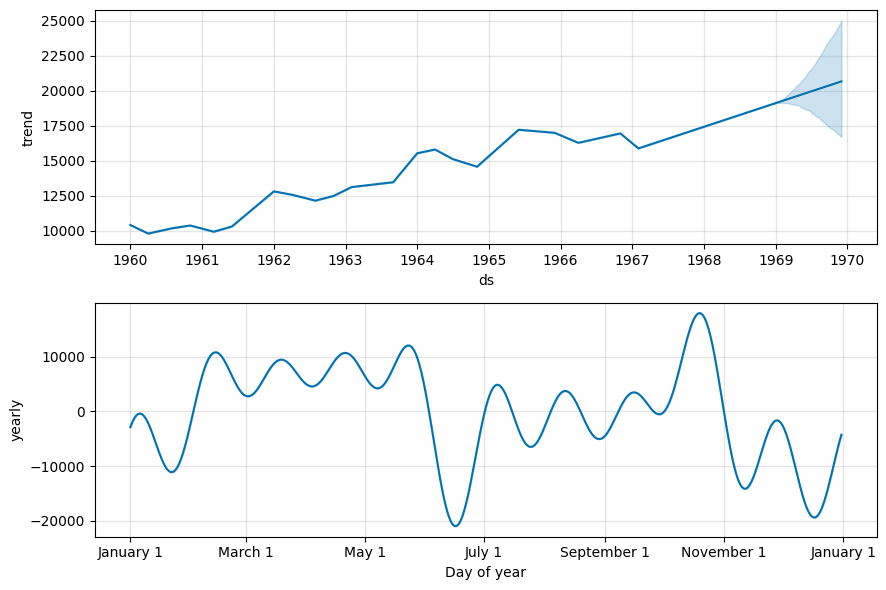

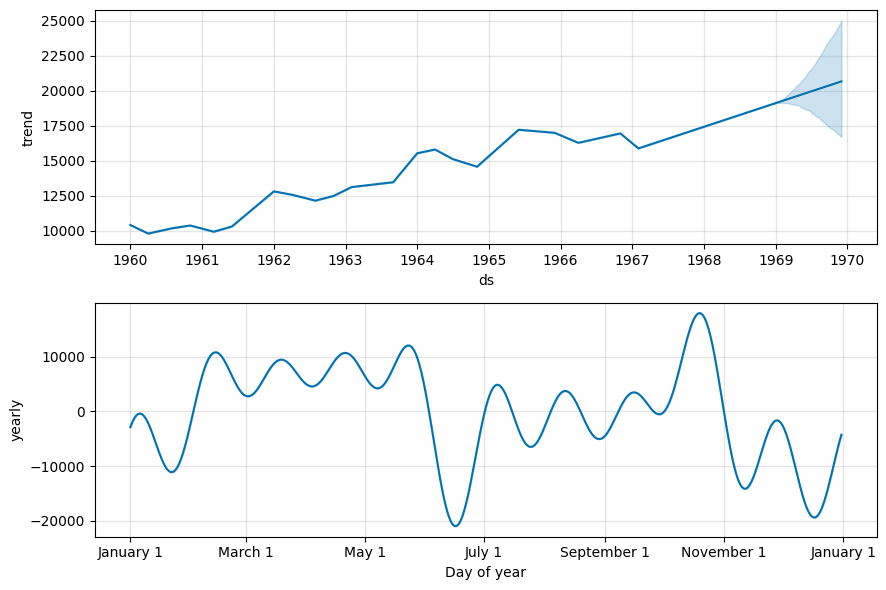

In [21]:
m.plot_components(forecast)

따로 changepoint에대한 파라미터를 입력하지 않았음에도 자동으로 찾은 듯 하다. 위 그래프 보면 Trend의 변화가 보임.

In [22]:
m = Prophet(
    seasonality_mode='additive', # default is 'additive'
    yearly_seasonality=True, # default is True
    weekly_seasonality=True, # default is True
    daily_seasonality=True, # default is False
    holidays=None, # default is None
    changepoint_prior_scale=0.05, # default is 0.05
    seasonality_prior_scale=10.0, # default is 10.0
    holidays_prior_scale=10.0, # default is 10.0
    changepoint_range=0.8, # default is 0.8
    n_changepoints=None, # default is None
    interval_width=0.8, # default is 0.8
    uncertainty_samples=1000, # default is 1000
    changepoints=None
)

#위 예시처럼 처럼 다양하게 지정해 줄 수 있음.

In [23]:
'''#change prior scale을 0으로 해보자

m = Prophet(
    changepoint_prior_scale=0
)

m.fit(df)

future = m.make_future_dataframe(periods=365)

# make predictions for the future dataframe
forecast = m.predict(future)

# plot the forecasted values and uncertainty intervals
m.plot(forecast)'''

'#change prior scale을 0으로 해보자\n\nm = Prophet(\n    changepoint_prior_scale=0\n)\n\nm.fit(df)\n\nfuture = m.make_future_dataframe(periods=365)\n\n# make predictions for the future dataframe\nforecast = m.predict(future)\n\n# plot the forecasted values and uncertainty intervals\nm.plot(forecast)'

학습 자체가 안됨

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/gnvuybw8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/n4o6r1e_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=782', 'data', 'file=/tmp/tmp42_q96t4/gnvuybw8.json', 'init=/tmp/tmp42_q96t4/n4o6r1e_.json', 'output', 'file=/tmp/tmp42_q96t4/prophet_modelm8a5mk_u/prophet_model-20230504033501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:35:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:35:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
03:35:01 - cmdstanpy - ERROR - Chain [1] e

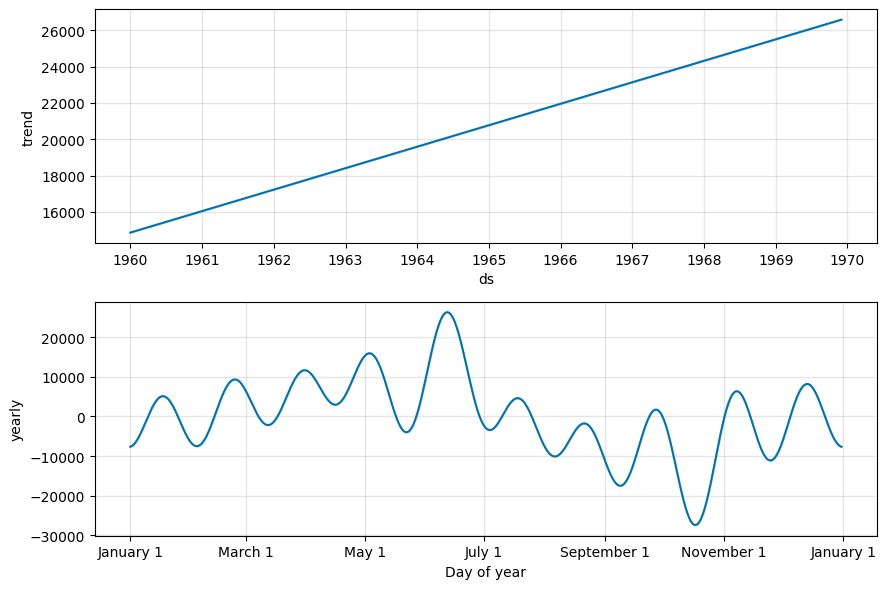

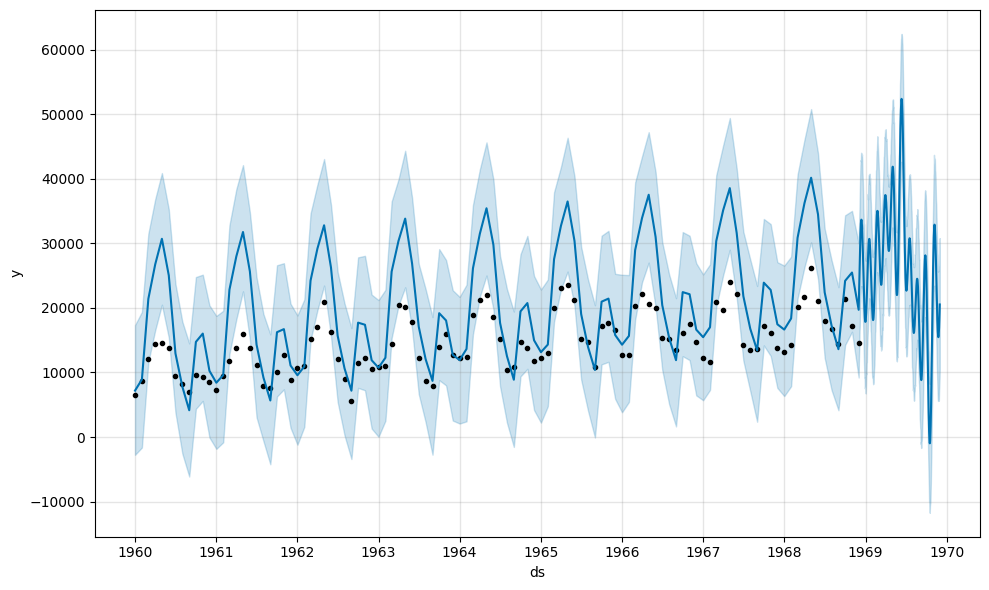

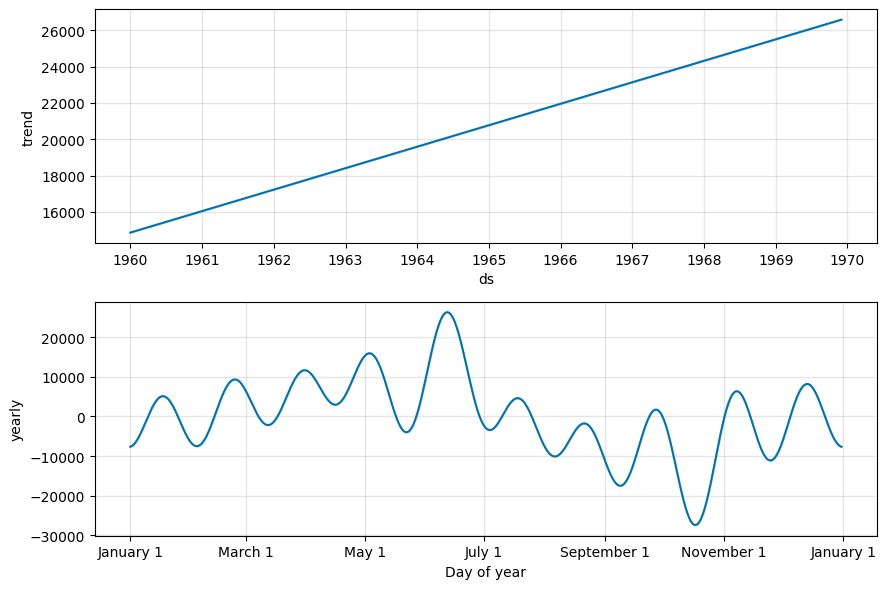

In [24]:
#change prior scale을 0에 가깝게

m = Prophet(
    changepoint_prior_scale=0.0000001
)

m.fit(df)

future = m.make_future_dataframe(periods=365)

# make predictions for the future dataframe
forecast = m.predict(future)

# plot the forecasted values and uncertainty intervals
m.plot(forecast)

m.plot_components(forecast)

Trend가 일직선 형태로 나와버렸다. Underfitting을 의미

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/px_yleqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/c6nn1qpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87348', 'data', 'file=/tmp/tmp42_q96t4/px_yleqg.json', 'init=/tmp/tmp42_q96t4/c6nn1qpi.json', 'output', 'file=/tmp/tmp42_q96t4/prophet_modelojx2cf8l/prophet_model-20230504033332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:33:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:33:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


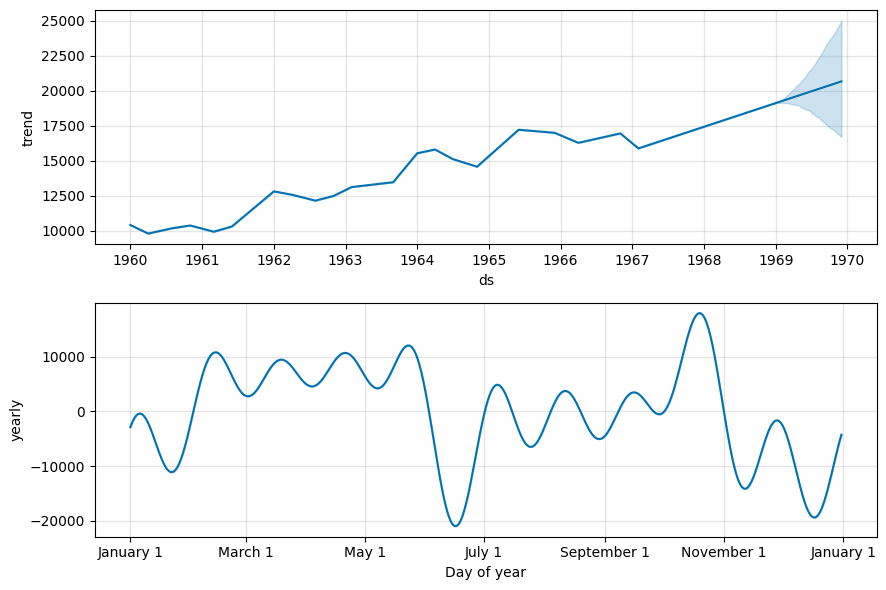

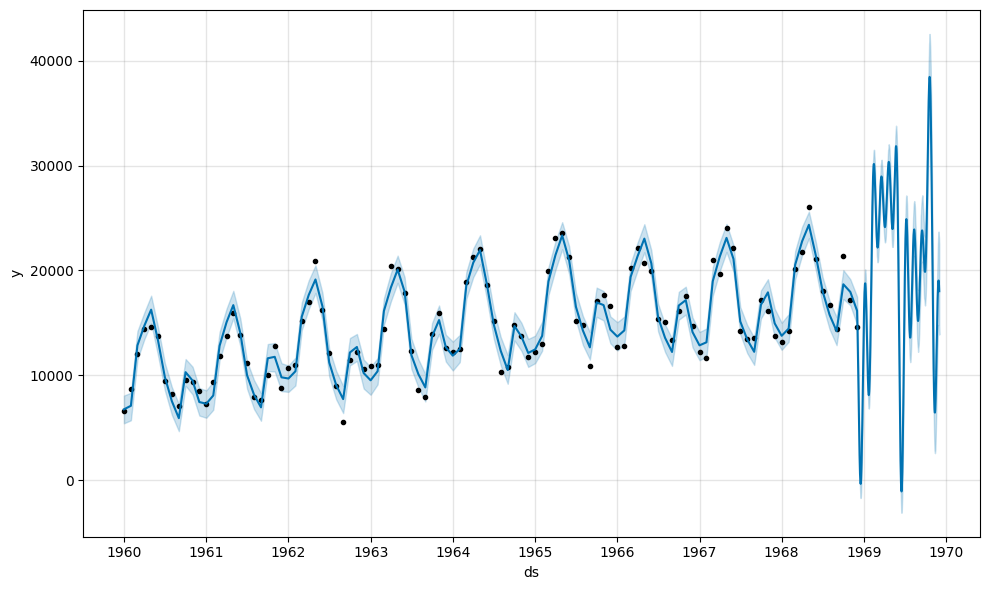

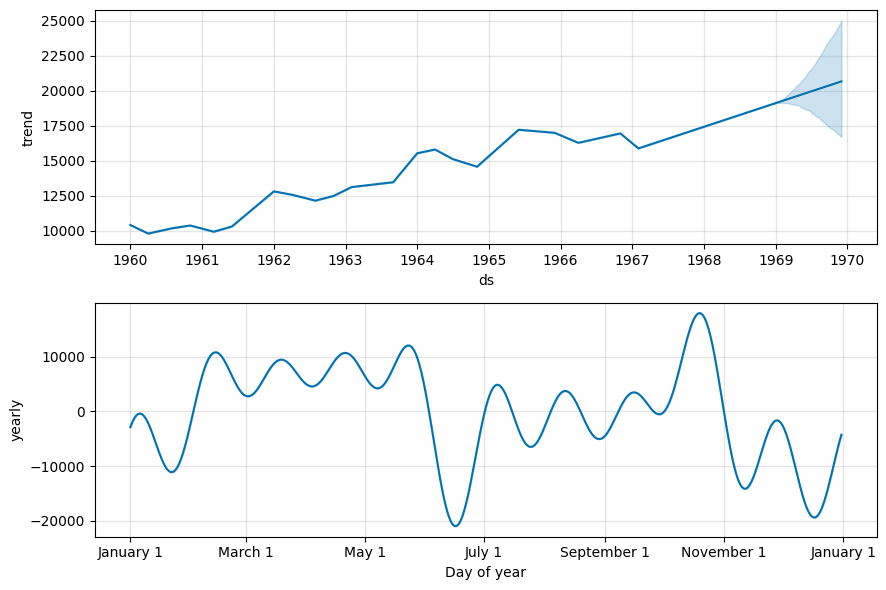

In [19]:
#change prior scale을 크게

m = Prophet(
    changepoint_prior_scale=3
)

m.fit(df)

future = m.make_future_dataframe(periods=365)

# make predictions for the future dataframe
forecast = m.predict(future)

# plot the forecasted values and uncertainty intervals
m.plot(forecast)

m.plot_components(forecast)

Trend 에 대한 uncertainty interval이 굉장히 크게 나옴 -> Overfitting을 의미함.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/vkshnj8e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/109syc0g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92061', 'data', 'file=/tmp/tmp42_q96t4/vkshnj8e.json', 'init=/tmp/tmp42_q96t4/109syc0g.json', 'output', 'file=/tmp/tmp42_q96t4/prophet_modelbyibxp16/prophet_model-20230504033727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:37:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:37:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


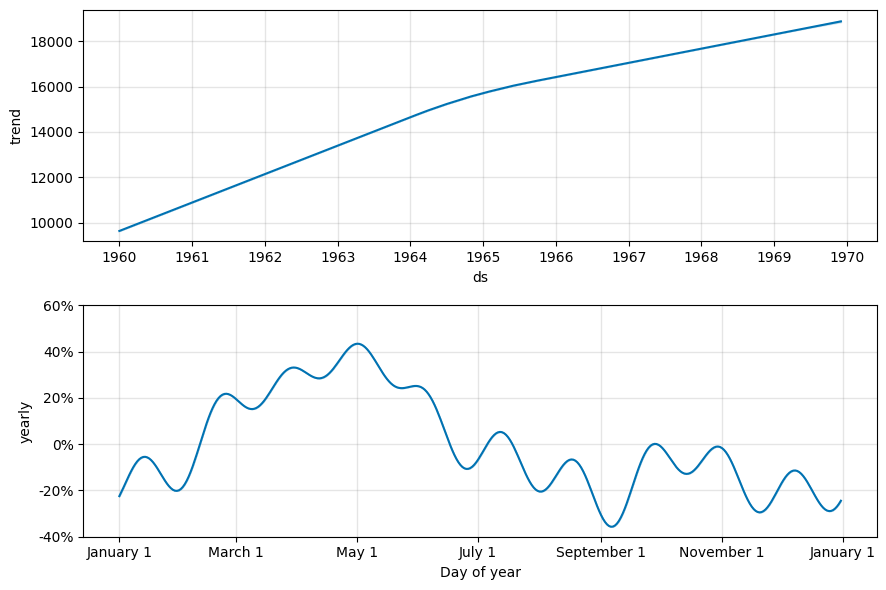

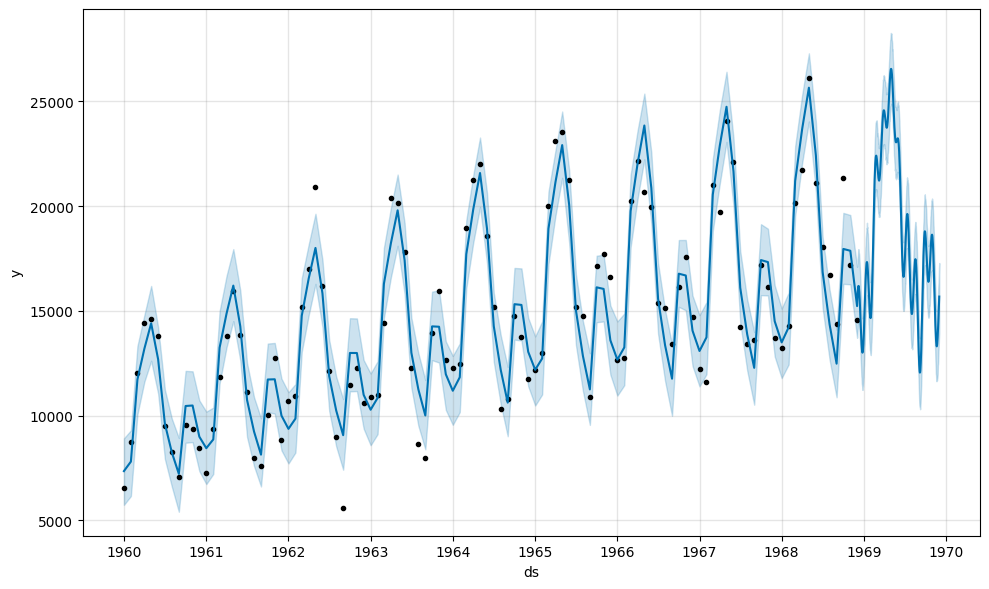

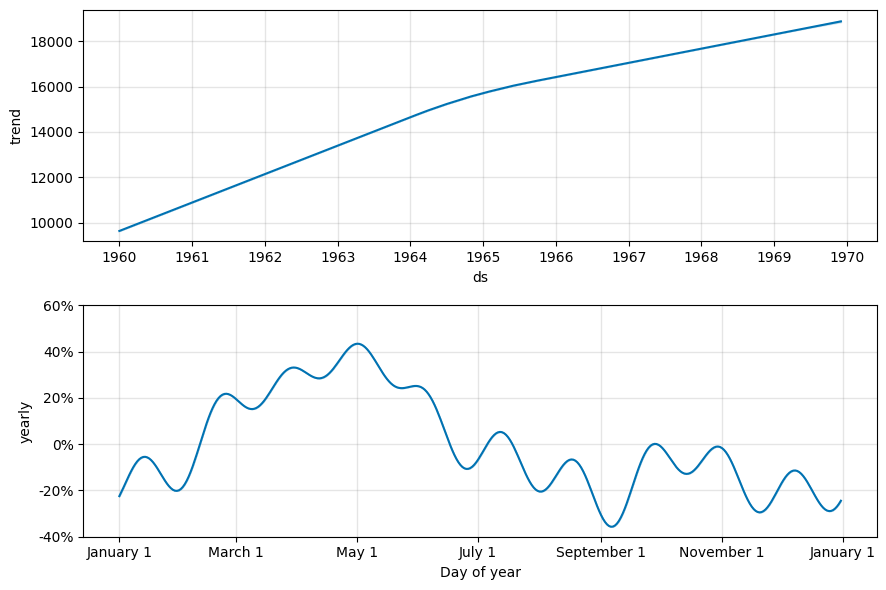

In [26]:
#multiplicative seasonality

m = Prophet(
    seasonality_mode = 'multiplicative'
)

m.fit(df)

future = m.make_future_dataframe(periods=365)

# make predictions for the future dataframe
forecast = m.predict(future)

# plot the forecasted values and uncertainty intervals
m.plot(forecast)

m.plot_components(forecast)

Seasonality 를 multiplicative로 setting하니 훨씬 합리적인 예측이 나왔다.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/57v2ocf0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/3mzhll47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33642', 'data', 'file=/tmp/tmp42_q96t4/57v2ocf0.json', 'init=/tmp/tmp42_q96t4/3mzhll47.json', 'output', 'file=/tmp/tmp42_q96t4/prophet_modely0jpr1p4/prophet_model-20230504034720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:47:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:47:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


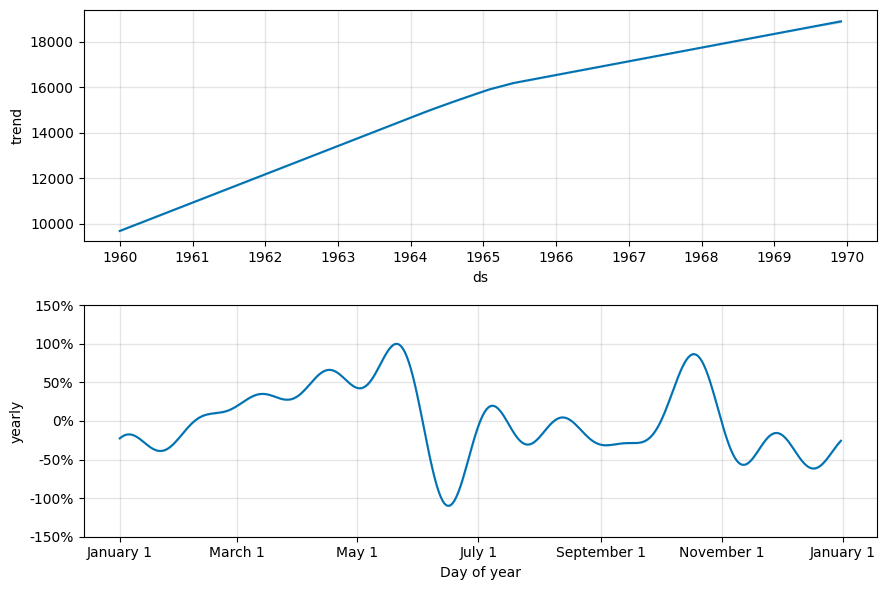

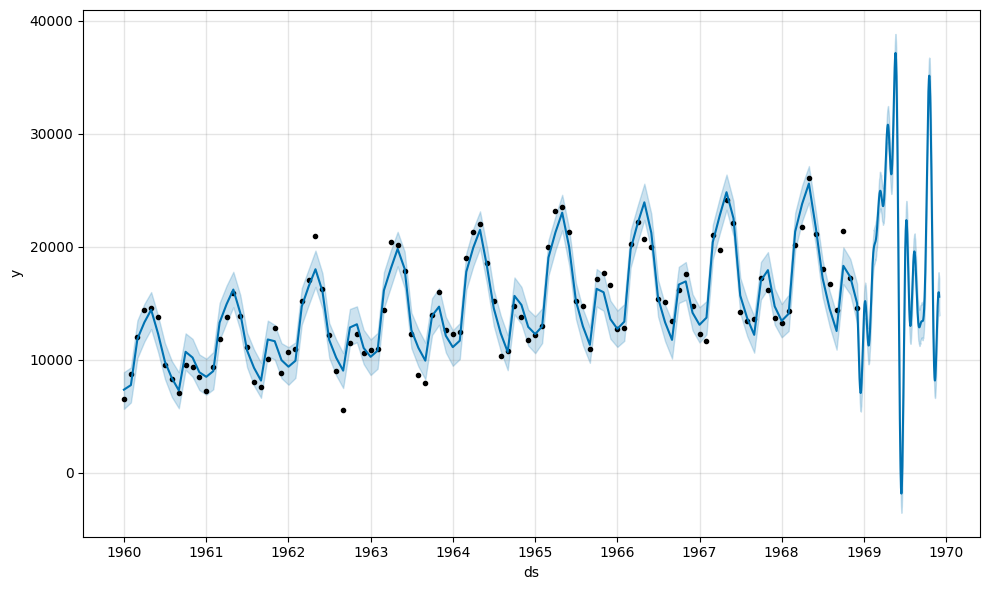

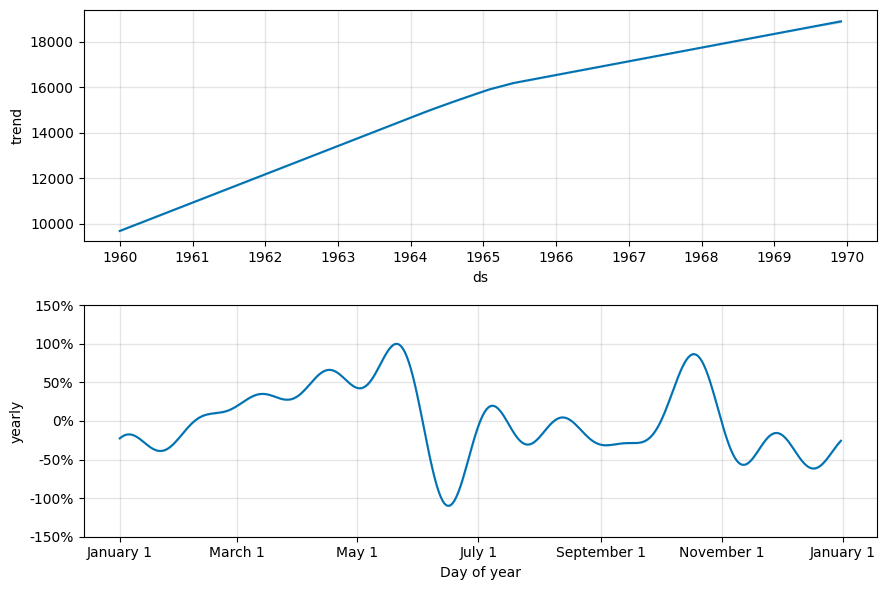

In [39]:
#seasonality prior scale을 작게

m = Prophet(
    seasonality_mode='multiplicative',
    seasonality_prior_scale = 4
    )

m.fit(df)

future = m.make_future_dataframe(periods=365)

# make predictions for the future dataframe
forecast = m.predict(future)

# plot the forecasted values and uncertainty intervals
m.plot(forecast)

m.plot_components(forecast)

Seasonality Scale을 줄이니 Seasonality가 굉장히 smooth해짐. 예측결과는 별로 좋지 않다.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/2k6t8774.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42_q96t4/09q1um24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28978', 'data', 'file=/tmp/tmp42_q96t4/2k6t8774.json', 'init=/tmp/tmp42_q96t4/09q1um24.json', 'output', 'file=/tmp/tmp42_q96t4/prophet_modeli3csoko4/prophet_model-20230504034713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:47:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:47:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


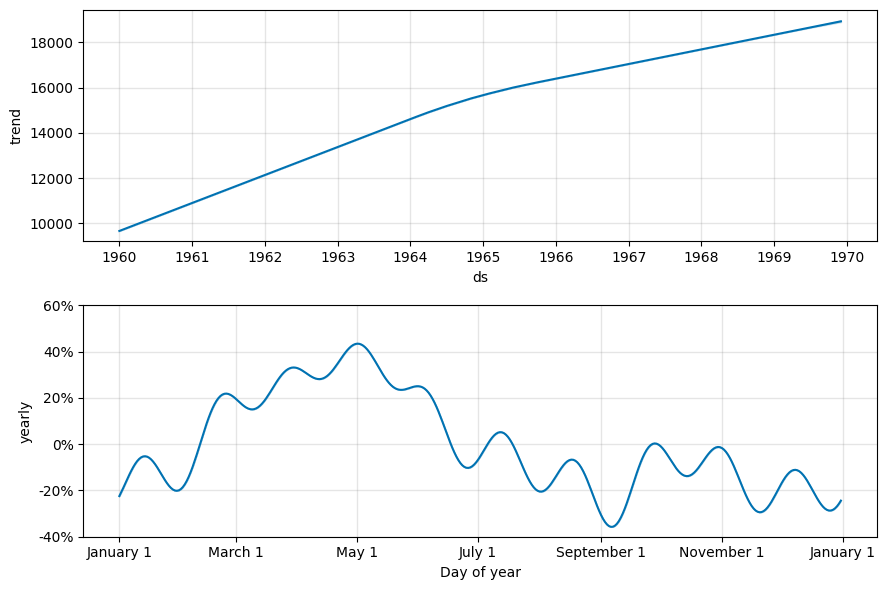

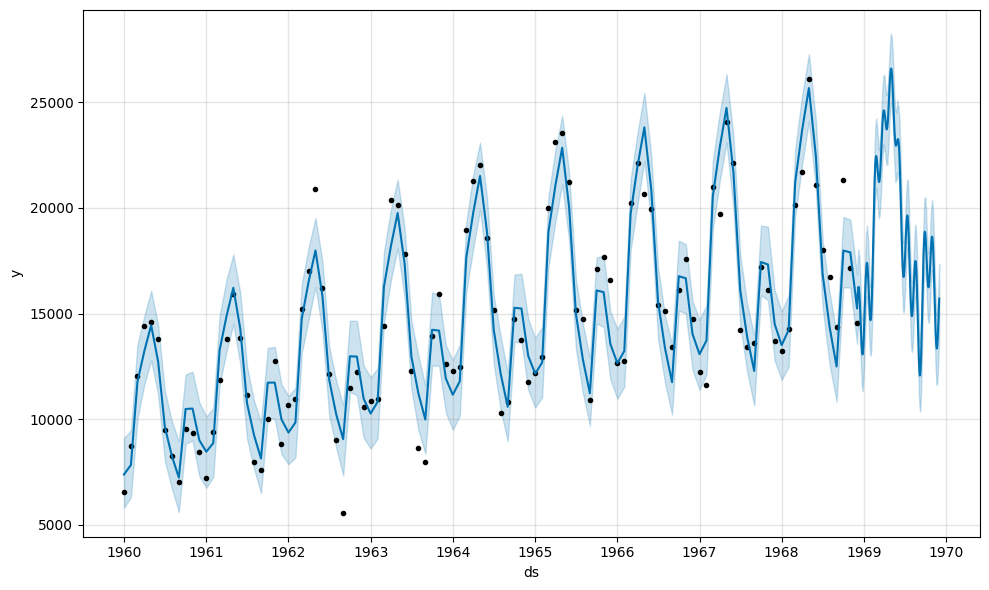

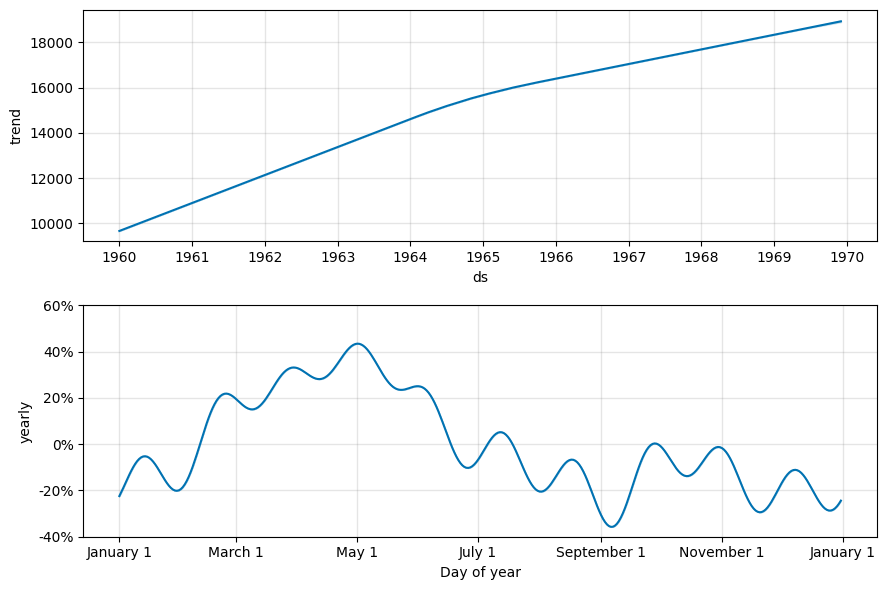

In [38]:
#seasonality prior scale을 크게

m = Prophet(
    seasonality_mode='multiplicative',
    seasonality_prior_scale = 30
    )

m.fit(df)

future = m.make_future_dataframe(periods=365)

# make predictions for the future dataframe
forecast = m.predict(future)

# plot the forecasted values and uncertainty intervals
m.plot(forecast)

m.plot_components(forecast)

크게 하는 것은 별차이가 없음. 이미 scale 10에서 충분히 overfitt되었다고 해석할 수도 있음.

In [ ]:
#seasonality prior scale을 크게

m = Prophet(
    seasonality_mode='multiplicative',
    growth = 'logistic' #growth logistic으로 설정
    )

m.fit(df)

future = m.make_future_dataframe(periods=365)

future['cap']

# make predictions for the future dataframe
forecast = m.predict(future)

# plot the forecasted values and uncertainty intervals
m.plot(forecast)

m.plot_components(forecast)